<a href="https://colab.research.google.com/github/patrickhuang5/project-2-cis-2100/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries
- Imports necessary libraries (pandas, numpy, random, matplotlib.pyplot, seaborn) for data manipulation and visualization.

In [23]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

2. Synthetic Data Generation
- Generates synthetic transactional data with various attributes such as transaction_id, store_name, product_name, product_category, total_price, and age_group for analysis.

In [24]:
# Synthetic Data Generation
def generate_synthetic_data(filepath="synthetic_project2_data.csv"):
    """
    Generate synthetic transactional data for analysis.
    """
    num_transactions = 2000
    transaction_ids = [f"T{i}" for i in range(1, num_transactions + 1)]
    store_names = [f"Store_{i}" for i in range(1, 11)]  # 10 stores
    product_names = [f"Product_{chr(65+i)}" for i in range(10)]  # Products A-J
    product_categories = ["Electronics", "Clothing", "Groceries", "Home", "Toys"]
    age_groups = ["18-25", "26-40", "41-60", "60+"]

    synthetic_data = {
        "transaction_id": random.choices(transaction_ids, k=num_transactions),
        "store_name": random.choices(store_names, k=num_transactions),
        "product_name": random.choices(product_names, k=num_transactions),
        "product_category": random.choices(product_categories, k=num_transactions),
        "total_price": np.random.uniform(5, 300, size=num_transactions).round(2),
        "age_group": random.choices(age_groups, k=num_transactions),
    }

    df = pd.DataFrame(synthetic_data)
    print(f"Synthetic data generated.")
    return df

3. Most Prevalent Products in Customer Baskets
- Analyzes the most frequent products in customer baskets and visualizes the top n products as a bar chart.

In [25]:
# 1. Most Prevalent Products
def most_prevalent_products(dataframe, top_n=10):
    product_counts = dataframe['product_name'].value_counts()
    product_counts.head(top_n).plot(kind='bar', color='cornflowerblue', figsize=(10, 6))
    plt.title('Most Prevalent Products in Customer Baskets')
    plt.xlabel('Product Name')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()  # Displaying the visualization inline
    return product_counts.head(top_n)

4. Frequency of Large Basket Buyers
- Analyzes the distribution of transaction totals, identifies large basket purchases (above a threshold), and visualizes it using a histogram.

In [26]:
# 2. Frequency of Large Basket Buyers
def large_basket_analysis(dataframe, threshold=100):
    transaction_totals = dataframe.groupby('transaction_id')['total_price'].sum()
    large_baskets = transaction_totals[transaction_totals >= threshold]

    plt.figure(figsize=(8, 6))
    plt.hist(transaction_totals, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
    plt.axvline(threshold, color='red', linestyle='dashed', linewidth=1.5, label=f'Large Basket Threshold: ${threshold}')
    plt.title('Distribution of Transaction Totals')
    plt.xlabel('Transaction Total ($)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()  # Displaying the visualization inline

    return {
        'large_basket_count': len(large_baskets),
        'total_transactions': len(transaction_totals),
        'large_basket_percentage': (len(large_baskets) / len(transaction_totals)) * 100,
    }

5. Stores Containing Large-Basket Buyers
- Identifies stores with a significant percentage of large-basket buyers and visualizes the top stores in a bar chart based on their frequency of large baskets.

In [27]:
# 3. Stores Containing Large-Basket Buyers
def store_large_basket_analysis(dataframe, threshold=100):
    transaction_totals = dataframe.groupby(['transaction_id', 'store_name'])['total_price'].sum().reset_index()
    large_baskets = transaction_totals[transaction_totals['total_price'] >= threshold]

    store_large_basket_counts = large_baskets['store_name'].value_counts()
    store_large_basket_percentage = (store_large_basket_counts / large_baskets['store_name'].count()) * 100

    store_large_basket_percentage.sort_values(ascending=False).head(10).plot(kind='bar', color='gold', figsize=(10, 6))
    plt.title('Top 10 Stores by Large Basket Frequency')
    plt.xlabel('Store Name')
    plt.ylabel('Percentage of Large Baskets')
    plt.tight_layout()
    plt.show()  # Displaying the visualization inline

    return store_large_basket_percentage


6. Top Products by Demographic
- Analyzes and visualizes the top products for each demographic group (age_group), displaying the results as a bar chart with counts.

In [28]:
# 5. Top Products by Demographic
def top_demographic_products(dataframe, demographic_column='age_group', top_n=5):
    demographic_counts = dataframe.groupby([demographic_column, 'product_name']).size().reset_index(name='count')
    top_products = demographic_counts.sort_values(['age_group', 'count'], ascending=[True, False])
    top_products = top_products.groupby(demographic_column).head(top_n)

    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_products, x='count', y='product_name', hue=demographic_column, palette='Set2')
    plt.title('Top Products by Demographic')
    plt.xlabel('Count')
    plt.ylabel('Product Name')
    plt.tight_layout()
    plt.show()  # Displaying the visualization inline
    return top_products

7. Basket Category Analysis
- Analyzes the composition of product categories in baskets and visualizes the proportions as a pie chart.

In [29]:
# 6. Basket Category Analysis
def basket_category_analysis(dataframe):
    category_percentages = dataframe['product_category'].value_counts(normalize=True) * 100
    plt.figure(figsize=(10, 6))
    plt.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title('Basket Composition by Product Category')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()  # Displaying the visualization inline
    return category_percentages

8. Main Analysis Exectuion
- Generates synthetic data and runs each analysis function sequentially, printing the results and displaying the relevant visualizations for each task.

Synthetic data generated.
1. Most Prevalent Products:


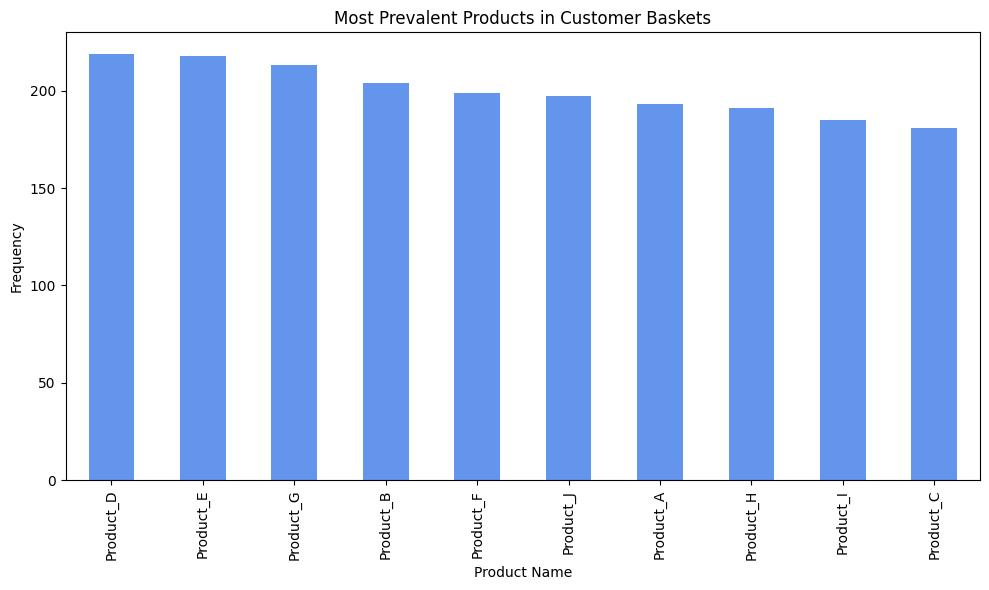

product_name
Product_D    219
Product_E    218
Product_G    213
Product_B    204
Product_F    199
Product_J    197
Product_A    193
Product_H    191
Product_I    185
Product_C    181
Name: count, dtype: int64

2. Large Basket Analysis:


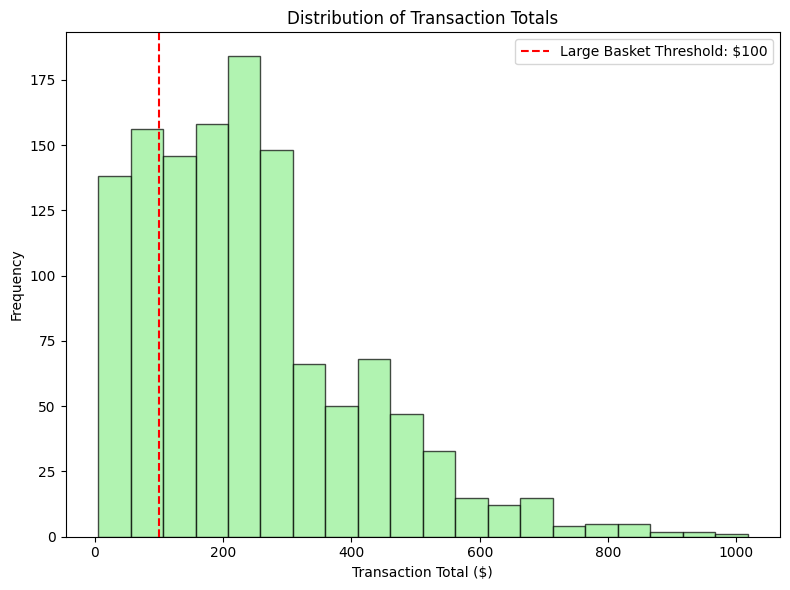

{'large_basket_count': 983, 'total_transactions': 1255, 'large_basket_percentage': 78.32669322709164}

3. Stores with Large Baskets:


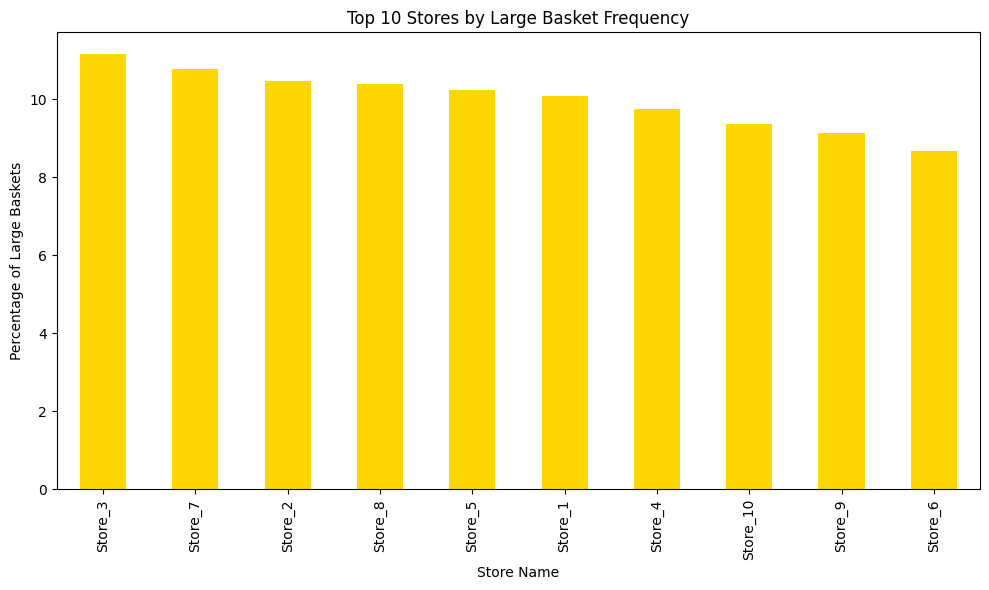

store_name
Store_3     11.154144
Store_7     10.766847
Store_2     10.457010
Store_8     10.379551
Store_5     10.224632
Store_1     10.069713
Store_4      9.759876
Store_10     9.372579
Store_9      9.140201
Store_6      8.675445
Name: count, dtype: float64

4. Top Products by Demographic:


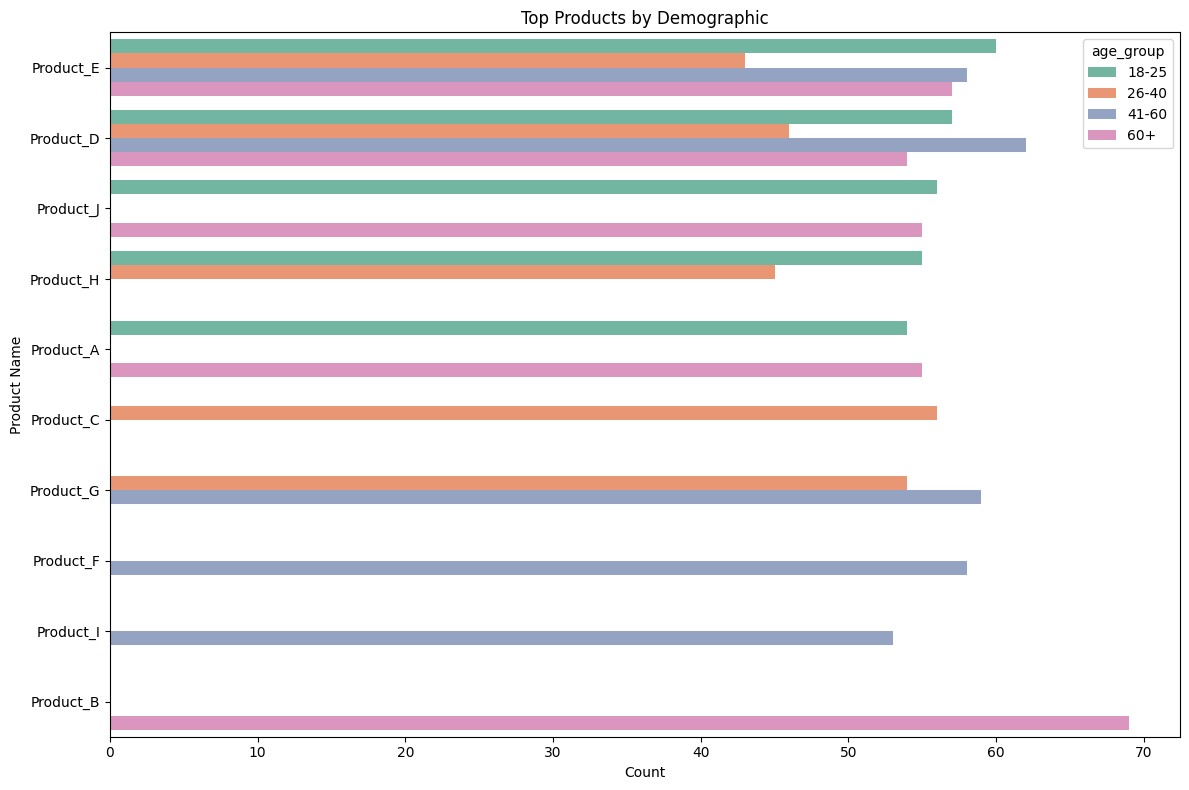

   age_group product_name  count
4      18-25    Product_E     60
3      18-25    Product_D     57
9      18-25    Product_J     56
7      18-25    Product_H     55
0      18-25    Product_A     54
12     26-40    Product_C     56
16     26-40    Product_G     54
13     26-40    Product_D     46
17     26-40    Product_H     45
14     26-40    Product_E     43
23     41-60    Product_D     62
26     41-60    Product_G     59
24     41-60    Product_E     58
25     41-60    Product_F     58
28     41-60    Product_I     53
31       60+    Product_B     69
34       60+    Product_E     57
30       60+    Product_A     55
39       60+    Product_J     55
33       60+    Product_D     54

5. Basket Category Analysis:


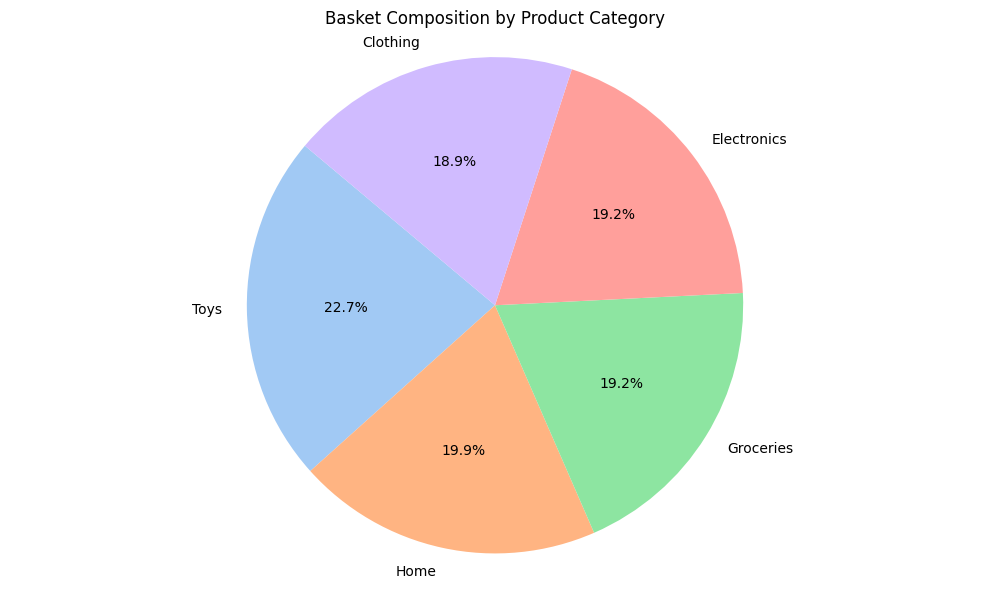

product_category
Toys           22.75
Home           19.90
Groceries      19.25
Electronics    19.20
Clothing       18.90
Name: proportion, dtype: float64


In [30]:
# Main Analysis Execution
if __name__ == "__main__":
    # Step 1: Generate synthetic data
    df = generate_synthetic_data()

    # Step 2: Analyze most prevalent products
    print("1. Most Prevalent Products:")
    prevalent_products = most_prevalent_products(df)
    print(prevalent_products)

    # Step 3: Analyze large basket buyers
    print("\n2. Large Basket Analysis:")
    large_basket_stats = large_basket_analysis(df)
    print(large_basket_stats)

    # Step 4: Analyze stores with large-basket buyers
    print("\n3. Stores with Large Baskets:")
    store_stats = store_large_basket_analysis(df)
    print(store_stats)

    # Step 5: Analyze top products by demographic
    print("\n4. Top Products by Demographic:")
    demographic_analysis = top_demographic_products(df)
    print(demographic_analysis)

    # Step 6: Basket category analysis
    print("\n5. Basket Category Analysis:")
    category_analysis = basket_category_analysis(df)
    print(category_analysis)